

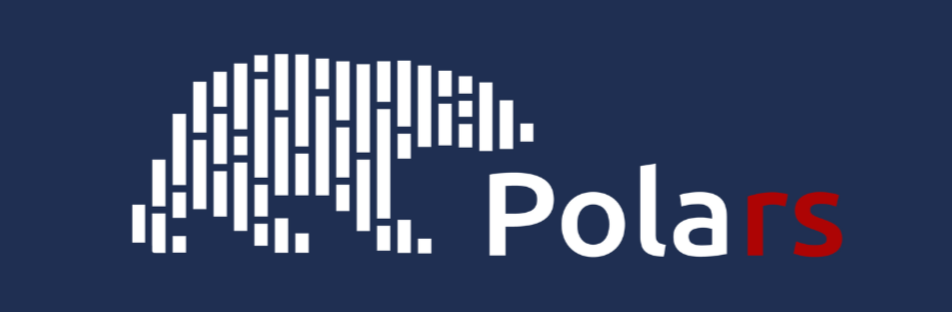

Polars is a high-performance DataFrame library designed to provide fast and efficient data processing capabilities. It offers a seamless experience for working with large datasets that might not fit into memory
. Inspired by the pandas library, Polars takes data processing to another level, offering massive performance boosts and lightning-fast execution.


**[Features:](https://pola.rs/)**
- Fast
- Easy to use
- Open source

In [3]:
# install polars
!pip install polars

In this notebook I will be using the famous [Gapminder dataset](https://pypi.org/project/gapminder/).

In [4]:
# install inbuilt gapminder dataset
!pip install gapminder

In [6]:
# import gapminder dataset
from gapminder import gapminder
# read the head
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [11]:
# prompt: Using dataframe gapminder: plot the average gdpPercap by continent with title

import altair as alt
chart = alt.Chart(gapminder).mark_bar().encode(
    x='continent:N',
    y='mean(gdpPercap):Q',
).properties(title='Average GDP per Capita by Continent')
chart


alt.Chart(...)

**Importing polars:**

In [12]:
import polars as pl

**Importing pandas:**

In [13]:
import pandas as pd

**Convert from pandas to polars:**

In [16]:
# read dataset from pandas dataframe to polars dataframe
df_gapminder = pl.from_pandas(gapminder)

In [18]:
# show the polars dataframe
df_gapminder.head()

country,continent,year,lifeExp,pop,gdpPercap
str,str,i64,f64,i64,f64
"""Afghanistan""","""Asia""",1952,28.801,8425333,779.445314
"""Afghanistan""","""Asia""",1957,30.332,9240934,820.85303
"""Afghanistan""","""Asia""",1962,31.997,10267083,853.10071
"""Afghanistan""","""Asia""",1967,34.02,11537966,836.197138
"""Afghanistan""","""Asia""",1972,36.088,13079460,739.981106


**Running some inbuilt functions:**

In [20]:
# get column names
df_gapminder.columns

['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap']

In [21]:
# shape of the dataframe
df_gapminder.shape

(1704, 6)

In [22]:
# schema of the dataframe
df_gapminder.schema

OrderedDict([('country', Utf8),
             ('continent', Utf8),
             ('year', Int64),
             ('lifeExp', Float64),
             ('pop', Int64),
             ('gdpPercap', Float64)])

In [30]:
# show the dataTypes
df_gapminder.dtypes

[Utf8, Utf8, Int64, Float64, Int64, Float64]

In [47]:
# glimspe of the dataframe
df_gapminder.glimpse()

Rows: 1704
Columns: 6
$ country   <str> 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan'
$ continent <str> 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia'
$ year      <i64> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997
$ lifeExp   <f64> 28.801, 30.332, 31.997, 34.02, 36.088, 38.438, 39.854, 40.822, 41.674, 41.763
$ pop       <i64> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372, 12881816, 13867957, 16317921, 22227415
$ gdpPercap <f64> 779.4453145, 820.8530296, 853.10071, 836.1971382, 739.9811058, 786.11336, 978.0114388, 852.3959448, 649.3413952, 635.341351



In [29]:
# general statistics on the dataframe
df_gapminder.describe()

describe,country,continent,year,lifeExp,pop,gdpPercap
str,str,str,f64,f64,f64,f64
"""count""","""1704""","""1704""",1704.0,1704.0,1704.0,1704.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0
"""mean""",null,null,1979.5,59.474439,2.9601e7,7215.327081
"""std""",null,null,17.26533,12.917107,1.0616e8,9857.454543
"""min""","""Afghanistan""","""Africa""",1952.0,23.599,60011.0,241.165876
"""25%""",null,null,1967.0,48.211,2.794552e6,1202.201361
"""50%""",null,null,1982.0,60.765,7.026113e6,3533.00391
"""75%""",null,null,1992.0,70.845,1.9576783e7,9325.068238
"""max""","""Zimbabwe""","""Oceania""",2007.0,82.603,1.3187e9,113523.1329


In [32]:
# counting missing values in eacy column
df_gapminder.null_count()

country,continent,year,lifeExp,pop,gdpPercap
u32,u32,u32,u32,u32,u32
0,0,0,0,0,0


In [37]:
# .filter function
df_gapminder.filter(pl.col('continent') == 'Asia',
                    pl.col('pop') > 10267083,
                    pl.col('year') == 2007
                  ).head()

country,continent,year,lifeExp,pop,gdpPercap
str,str,i64,f64,i64,f64
"""Afghanistan""","""Asia""",2007,43.828,31889923,974.580338
"""Bangladesh""","""Asia""",2007,64.062,150448339,1391.253792
"""Cambodia""","""Asia""",2007,59.723,14131858,1713.778686
"""China""","""Asia""",2007,72.961,1318683096,4959.114854
"""India""","""Asia""",2007,64.698,1110396331,2452.210407


In [42]:
# subset columns
df_gapminder[['continent', 'year', 'lifeExp']].head()

continent,year,lifeExp
str,i64,f64
"""Asia""",1952,28.801
"""Asia""",1957,30.332
"""Asia""",1962,31.997
"""Asia""",1967,34.02
"""Asia""",1972,36.088


In [44]:
# .get_column for a specific
df_gapminder.get_column('continent').head(3)

continent
str
"""Asia"""
"""Asia"""
"""Asia"""


In [46]:
# .get_column_index
df_gapminder.get_column_index('lifeExp')

3

In [50]:
# check for duplicate
df_gapminder.filter(df_gapminder.is_duplicated())

country,continent,year,lifeExp,pop,gdpPercap
str,str,i64,f64,i64,f64


In [52]:
# .is_empty() to check if the dataset is empty
df_gapminder.is_empty()

False

In [54]:
# checking for unique lines
df_gapminder.filter(df_gapminder.is_unique()).shape

(1704, 6)

In [57]:
# get max value vertically
df_gapminder.max()

country,continent,year,lifeExp,pop,gdpPercap
str,str,i64,f64,i64,f64
"""Zimbabwe""","""Oceania""",2007,82.603,1318683096,113523.1329


In [64]:
# Renaming
renamed_DF = df_gapminder.rename({'lifeExp': 'life_expectancy',
                                  'country':'Country',
                                  'continent':'Continent',
                                  'year':'Year',
                                  'pop':'Population',
                                  'gdpPercap':'GDPperCap'})

renamed_DF.head()

Country,Continent,Year,life_expectancy,Population,GDPperCap
str,str,i64,f64,i64,f64
"""Afghanistan""","""Asia""",1952,28.801,8425333,779.445314
"""Afghanistan""","""Asia""",1957,30.332,9240934,820.85303
"""Afghanistan""","""Asia""",1962,31.997,10267083,853.10071
"""Afghanistan""","""Asia""",1967,34.02,11537966,836.197138
"""Afghanistan""","""Asia""",1972,36.088,13079460,739.981106


In [66]:
# Sorting the dataframe
df_gapminder.sort('gdpPercap', descending=True).head()

country,continent,year,lifeExp,pop,gdpPercap
str,str,i64,f64,i64,f64
"""Kuwait""","""Asia""",1957,58.033,212846,113523.1329
"""Kuwait""","""Asia""",1972,67.712,841934,109347.867
"""Kuwait""","""Asia""",1952,55.565,160000,108382.3529
"""Kuwait""","""Asia""",1962,60.47,358266,95458.11176
"""Kuwait""","""Asia""",1967,64.624,575003,80894.88326
